In [304]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en import English
from nltk.corpus import stopwords
import string
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from math import sqrt, floor
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

[nltk_data] Downloading package wordnet to /Users/sjones/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
best5 = pd.read_csv("last_five_years_books.csv")
best1 = pd.read_csv("last_year_books.csv")

In [66]:
best5.drop_duplicates(subset=['author','title'], inplace=True)
best1.drop_duplicates(subset=['author','title'], inplace=True)

In [5]:
best5.head()

,Unnamed: 0,age_group,amazon_product_url,article_chapter_link,asterisk,author,book_image,book_image_height,book_image_width,book_review_link,...,isbns,price,primary_isbn10,primary_isbn13,publisher,rank,rank_last_week,sunday_review_link,title,weeks_on_list
0,0,NaN,https://www.amazon.com/One-Good-Deed-David-Bal...,NaN,0,David Baldacci,https://s1.nyt.com/du/books/images/97815387505...,495.0,328.0,NaN,...,"[{'isbn10': '1538750562', 'isbn13': '978153875...",0,1538750554,9781538750551,Grand Central,1,0,NaN,ONE GOOD DEED,1
1,1,NaN,https://www.amazon.com/Where-Crawdads-Sing-Del...,NaN,0,Delia Owens,https://s1.nyt.com/du/books/images/97807352190...,495.0,328.0,NaN,...,"[{'isbn10': '0735219095', 'isbn13': '978073521...",0,0735219095,9780735219090,Putnam,2,2,NaN,WHERE THE CRAWDADS SING,46
2,2,NaN,https://www.amazon.com/New-Girl-Novel-Gabriel-...,NaN,0,Daniel Silva,https://s1.nyt.com/du/books/images/97800628348...,495.0,328.0,NaN,...,"[{'isbn10': '0062834835', 'isbn13': '978006283...",0,0062834894,9780062834898,Harper,3,1,NaN,THE NEW GIRL,2
3,3,NaN,https://www.amazon.com/Nickel-Boys-Novel-Colso...,NaN,0,Colson Whitehead,https://s1.nyt.com/du/books/images/97803855370...,495.0,328.0,https://www.nytimes.com/2019/07/11/books/revie...,...,"[{'isbn10': '0385537077', 'isbn13': '978038553...",0,0385537077,9780385537070,Doubleday,4,3,NaN,THE NICKEL BOYS,2
4,4,NaN,https://www.amazon.com/Reckoning-Novel-John-Gr...,NaN,0,John Grisham,https://s1.nyt.com/du/books/images/97803855441...,495.0,326.0,NaN,...,"[{'isbn10': '0385544154', 'isbn13': '978038554...",0,0525620931,9780525620938,Doubleday,5,8,NaN,THE RECKONING,24


In [32]:
print(best5.shape)
print(best5.columns)
print(best5.iloc[0]["book_image"])

(1494, 27)
Index(['Unnamed: 0', 'age_group', 'amazon_product_url', 'article_chapter_link',
       'asterisk', 'author', 'book_image', 'book_image_height',
       'book_image_width', 'book_review_link', 'book_uri', 'buy_links',
       'contributor', 'contributor_note', 'dagger', 'description',
       'first_chapter_link', 'isbns', 'price', 'primary_isbn10',
       'primary_isbn13', 'publisher', 'rank', 'rank_last_week',
       'sunday_review_link', 'title', 'weeks_on_list'],
      dtype='object')
https://s1.nyt.com/du/books/images/9781538750568.jpg


In [127]:
titles = best5["title"]
best5 = best5.dropna(subset=["description"])
print(best5.shape)

titles1 = best1["title"]
best1 = best1.dropna(subset=["description"])
print(best1.shape)

(1398, 29)
(272, 29)


There are 24002 words in the combination of all titles.


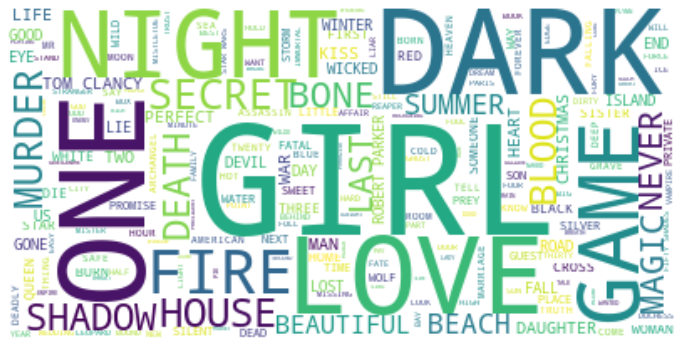

In [12]:
all_titles = " ".join(title for title in titles)
stopwords= set(STOPWORDS)
print("There are {} words in the combination of all titles.".format(len(all_titles)))

wc = WordCloud(background_color="white") 
               #max_words=2000, 
               #min_font_size =8, 
               #max_font_size=20, 
               #relative_scaling = 0.5, 
               #stopwords=stopwords,
               #normalize_plurals= True)
one_year = wc.generate(all_titles)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
plt.show()
one_year.to_file("five_years2.png")

There are 4470 words in the combination of all titles.


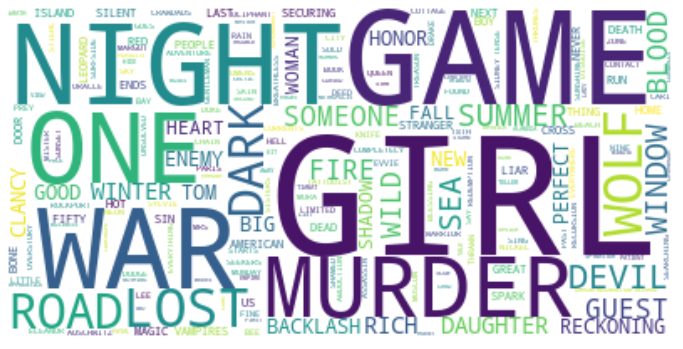

In [68]:
all_titles = " ".join(title for title in titles1)
stopwords= set(STOPWORDS)
print("There are {} words in the combination of all titles.".format(len(all_titles)))

wc = WordCloud(background_color="white") 
               #max_words=2000, 
               #min_font_size =8, 
               #max_font_size=20, 
               #relative_scaling = 0.5, 
               #stopwords=stopwords,
               #normalize_plurals= True)
one_year = wc.generate(all_titles)
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
plt.show()
#one_year.to_file("five_years2.png")

In [128]:
def get_lemma(word):
    #print("un-lemmad word: ", word)
    lemma = wn.morphy(word)
    #print("lemma-d word: ", lemma)
    if lemma is None:
        return word
    else:
        return lemma

parser = English()
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        #lemmatizes, converts to lowercase, omits pronouns
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    #removes stop word tokens and symbols
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    tokens = [token for token in tokens if len(token) > 3]
    # here we are lemmatizing again too; noticed that previous lemmatization doesn't handle plurals
    tokens = [get_lemma(token) for token in tokens]
    return tokens

print(tokenizeText("A Game of Thrones"))
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenizeText, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(best5["description"])
%time tfidf_matrix1 = tfidf_vectorizer.fit_transform(best1["description"])

['game', 'throne']


/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['good', 'little', 'make'] not in stop_words.



CPU times: user 890 ms, sys: 74.7 ms, total: 965 ms
Wall time: 1.01 s
CPU times: user 114 ms, sys: 2.64 ms, total: 117 ms
Wall time: 119 ms


# Clustering

## KMeans

In [312]:
from sklearn.cluster import KMeans

num_clusters = floor(sqrt(best5.shape[0]))

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(len(clusters))
print("Number of Clusters: ", num_clusters)

CPU times: user 3.32 s, sys: 127 ms, total: 3.45 s
Wall time: 1.81 s
1398
Number of Clusters:  37


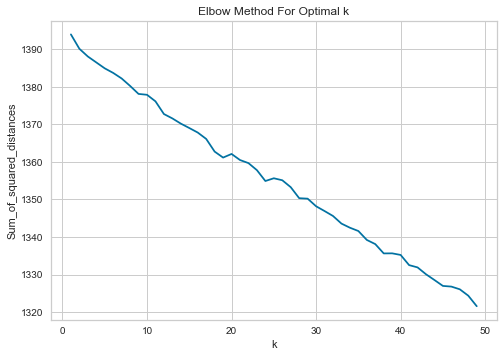

In [289]:
# Find optimum number of clusters using elbow method

Sum_of_squared_distances = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig("elbow_method.png")

In [303]:
K = range(2,50)
for k in K:
    clusterer = KMeans(n_clusters=k)
    preds = clusterer.fit_predict(tfidf_matrix)
    centers = clusterer.cluster_centers_

    score = silhouette_score(tfidf_matrix, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.0013711032863772444
For n_clusters = 3, silhouette score is 0.0014533928073041378
For n_clusters = 4, silhouette score is 0.0011861068195027102
For n_clusters = 5, silhouette score is 0.0014463410135685223
For n_clusters = 6, silhouette score is 0.0013480393067040243
For n_clusters = 7, silhouette score is 0.001424984864590497
For n_clusters = 8, silhouette score is 0.0014323023342480384
For n_clusters = 9, silhouette score is 0.0015320699525768183
For n_clusters = 10, silhouette score is 0.0018818220231403427
For n_clusters = 11, silhouette score is 0.0017098127985225755
For n_clusters = 12, silhouette score is 0.002138285394903306
For n_clusters = 13, silhouette score is 0.0017011970109297844
For n_clusters = 14, silhouette score is 0.0017248517079588698
For n_clusters = 15, silhouette score is 0.0018263854481431149
For n_clusters = 16, silhouette score is 0.002264260436756614
For n_clusters = 17, silhouette score is 0.0024504687189817608
For

For n_clusters = 10 The average silhouette_score is : 0.002339677999764226
For n_clusters = 20 The average silhouette_score is : 0.0027619249629632727
For n_clusters = 30 The average silhouette_score is : 0.0037774693305798893
For n_clusters = 40 The average silhouette_score is : 0.005042264314485763
For n_clusters = 50 The average silhouette_score is : 0.005573389799084564


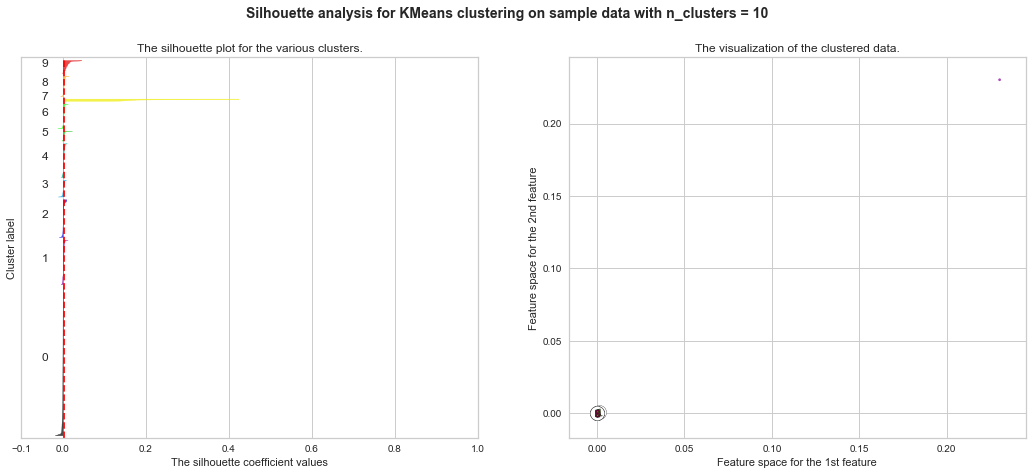

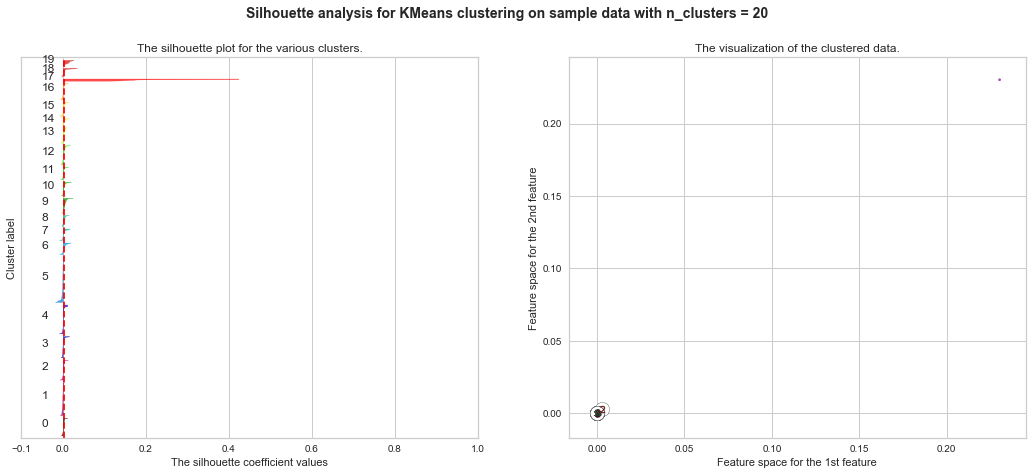

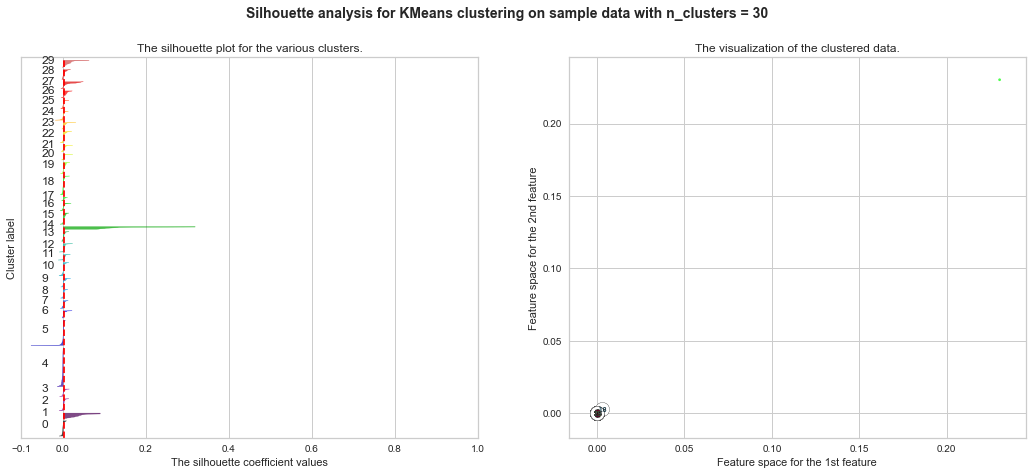

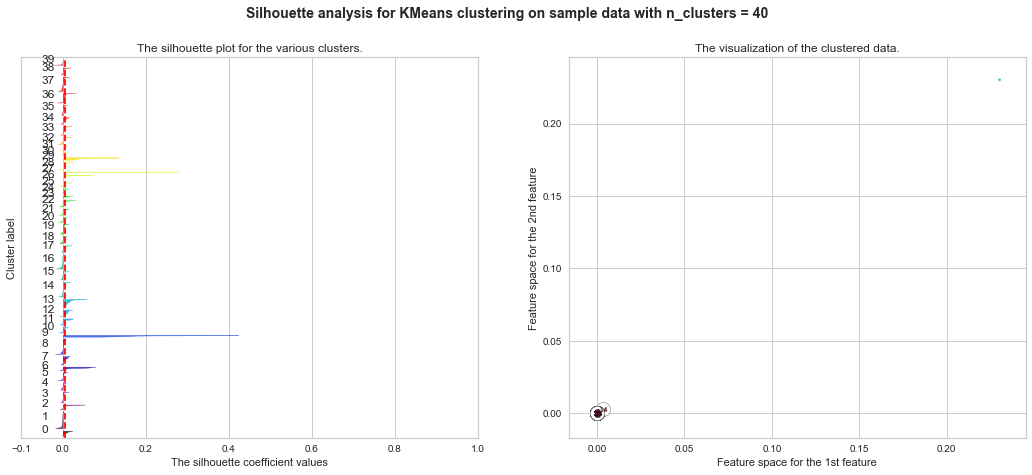

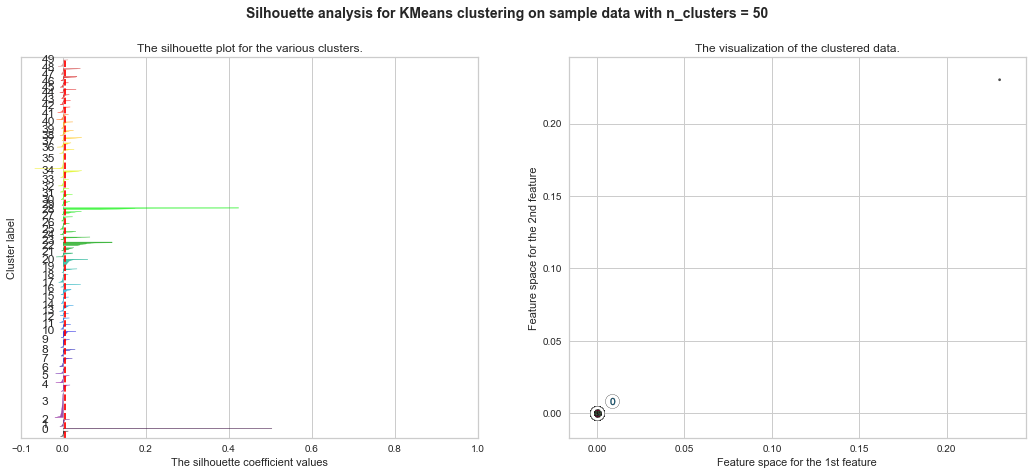

In [310]:
import matplotlib.cm as cm
range_n_clusters = [10, 20, 30, 40, 50]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, tfidf_matrix.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(tfidf_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tfidf_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tfidf_matrix[:, 0].toarray(), tfidf_matrix[:, 1].toarray(), marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Spectral Clustering

In [314]:
clustering = SpectralClustering(n_clusters=num_clusters,
                               assign_labels="discretize",
                               n_neighbors=num_clusters).fit(tfidf_matrix)

In [315]:
# look at distribution of cluster labels
cluster_counts = pd.Series(clustering.labels_).value_counts()
print(cluster_counts)

0     261
33     88
13     87
36     65
18     64
17     64
2      63
10     59
1      58
19     49
30     48
32     47
24     42
9      41
27     41
23     37
31     34
14     33
25     29
26     28
28     19
16     18
11     15
7      15
21     13
29     12
22     11
8      10
35      9
20      7
6       6
34      5
4       5
12      5
5       4
15      3
3       3
dtype: int64


In [316]:
def get_post_info_by_cluster(number, 
                             data,
                             cluster):
    return(data[cluster.labels_ == number])


In [317]:
cluster_string = [[]*num_clusters for x in range(num_clusters)]
for i in range(num_clusters):
    
    print(f"Cluster {i}:\n")
    cluster_series = get_post_info_by_cluster(i, 
                                   data = best5["description"],
                                   cluster = clustering)
    print(cluster_series)
    print("\n")
    for j in cluster_series:
        cluster_string[i].append(str(j))

Cluster 0:

4       A decorated World War II veteran shoots and ki...
5       A Star Wars saga. Grand Admiral Thrawn must ch...
42      Winner of the 2019 Pulitzer Prize for fiction....
43      Rachel Klein is ensnared in a pay-it-forward c...
55      A photographer embarks on a road trip to recon...
109     A dead multibillionaire’s brain is scanned and...
131     Maxim Trevelyan inherits several estates and b...
133     A recluse who drinks heavily and takes prescri...
138     Hans-Peter Schneider pauses his ghastly deeds ...
208     Theo Faber looks into the mystery of a famous ...
228     Investigations by Leaphorn, Chee and Manuelito...
237     A pregnant 18-year-old has limited time to cha...
283     After tragedy strikes, a child TV star loses h...
284     A British journalist and a Russian female bomb...
299     Marcus Ryker and Oleg Kraskin must stop a nucl...
312     The friendship over many decades of two female...
344     A loner named Tracker teams up with a group of...
37

In [338]:
cluster2 = get_post_info_by_cluster(2, data = best5["description"], cluster=clustering)
print(cluster2.iloc[0])
print(cluster2.iloc[1])
print(cluster2.iloc[2])
print(cluster2.iloc[3])
print(cluster2.iloc[4])

Sally Grissom investigates the disappearance of President Harrison Tucker’s wife.
D.D. Warren and Flora Dane investigate whether a pregnant woman shot and killed her husband.
Detective Dave Robicheaux and his new partner Bailey Ribbons investigate the death of a young woman by crucifixion.
Nick Fourcade and Annie Broussard, a husband-and-wife detective team, investigate a boy’s murder and the disappearance of his babysitter.
A television producer investigates the murder of a physician and whether it was his wife who killed him.


In [319]:
tokenizer = RegexpTokenizer(r'\w+')
cluster_string = [tokenizer.tokenize(str(i).lower()) for i in cluster_string]
cluster_freqs = [nltk.FreqDist(i) for i in cluster_string]
#print(cluster_freqs)

In [320]:
compute_median = [[]*num_clusters for x in range(num_clusters)]
for clust in range(num_clusters):
    for word in range(len(cluster_string[clust])):
        this_word = cluster_string[clust][word]
        compute_median[clust].append(cluster_freqs[clust][this_word])

In [321]:
# those words that are longer than n characters and occur more than m times
n = 5
m = 3
for clust in range(len(cluster_string)):
    print(f"Cluster {clust}:\n")
    print(sorted(w for w in set(cluster_string[clust]) if len(w) > n and cluster_freqs[clust][w] > m))
    #print(sorted(w for w in set(cluster_string[clust]) if cluster_freqs[clust][w] > m))

Cluster 0:

['america', 'american', 'ancient', 'artist', 'becomes', 'between', 'british', 'criminal', 'dangerous', 'during', 'encounters', 'father', 'follows', 'forensic', 'former', 'friendship', 'herself', 'investigation', 'investigator', 'involving', 'island', 'missing', 'mysterious', 'nantucket', 'parents', 'people', 'private', 'pursues', 'search', 'sequel', 'series', 'summer', 'together', 'treasure', 'vampire', 'wedding']
Cluster 1:

['college', 'falling', 'herself', 'security', 'series', 'student']
Cluster 2:

['detective', 'detectives', 'disappearance', 'husband', 'investigate', 'investigates', 'lieutenant', 'murder', 'partner', 'president', 'series']
Cluster 3:

[]
Cluster 4:

['brothers']
Cluster 5:

['legacy']
Cluster 6:

['barrington', 'series']
Cluster 7:

['cotton', 'counterterrorism', 'former', 'harvath', 'malone', 'operative']
Cluster 8:

['brotherhood', 'dagger', 'series']
Cluster 9:

['detective', 'killer', 'serial']
Cluster 10:

['author', 'collection', 'hunter', 'nove

In [277]:
# get median frequency word for a given cluster

#cluster_string[0][0]
#np.median(compute_median[0])
#print(list(cluster_freqs[0].keys())[list(cluster_freqs[0].values()).index(np.median(compute_median[0]))])

after


In [356]:
cluster_freqs[0].most_common()

[('a', 347),
 ('the', 202),
 ('of', 120),
 ('and', 113),
 ('to', 110),
 ('in', 106),
 ('an', 69),
 ('her', 53),
 ('s', 49),
 ('on', 43),
 ('his', 40),
 ('for', 40),
 ('is', 40),
 ('with', 39),
 ('when', 28),
 ('who', 26),
 ('from', 21),
 ('she', 18),
 ('after', 18),
 ('as', 17),
 ('by', 16),
 ('must', 15),
 ('at', 14),
 ('their', 13),
 ('new', 13),
 ('world', 12),
 ('between', 12),
 ('man', 12),
 ('war', 11),
 ('has', 11),
 ('into', 11),
 ('up', 11),
 ('two', 10),
 ('they', 10),
 ('out', 10),
 ('but', 9),
 ('search', 9),
 ('during', 9),
 ('he', 9),
 ('crew', 9),
 ('finds', 9),
 ('takes', 8),
 ('mysterious', 8),
 ('pursues', 8),
 ('have', 7),
 ('time', 7),
 ('old', 7),
 ('north', 7),
 ('over', 7),
 ('find', 7),
 ('dangerous', 7),
 ('american', 7),
 ('sequel', 7),
 ('that', 7),
 ('wedding', 7),
 ('be', 7),
 ('more', 7),
 ('ii', 6),
 ('drawn', 6),
 ('may', 6),
 ('stop', 6),
 ('while', 6),
 ('lives', 6),
 ('former', 6),
 ('together', 6),
 ('will', 6),
 ('treasure', 6),
 ('one', 6),
 ('firs

In [357]:
# get clusters bigger than expected
max_cluster_size = num_clusters * 2
big_clusters = cluster_counts[cluster_counts > max_cluster_size]
print(big_clusters)

0     261
33     88
13     87
dtype: int64


In [358]:
# sub-cluster first (biggest) cluster
cluster_label = big_clusters.index[0]

sub_sample = best5["description"][clustering.labels_ == cluster_label]
sub_cluster_embeddings = tfidf_matrix[clustering.labels_ == cluster_label]

number_sub_clusters = floor(sqrt(sub_sample.shape[0]))

sub_cluster = SpectralClustering(n_clusters=number_sub_clusters, 
                                 assign_labels="discretize", 
                                 n_neighbors=number_sub_clusters).fit(sub_cluster_embeddings)

In [359]:
# look at distribution of cluster labels
cluster_counts = pd.Series(sub_cluster.labels_).value_counts()
print(cluster_counts)

4     97
1     27
13    20
6     17
10    15
15    14
14    13
2     13
12     9
8      8
0      7
11     5
9      5
5      5
7      4
3      2
dtype: int64


In [360]:
print(number_sub_clusters)
sub_cluster_string = [[]*number_sub_clusters for x in range(number_sub_clusters)]
for i in range(number_sub_clusters):
    
    print(f"Cluster {i}:\n")
    sub_cluster_series = get_post_info_by_cluster(i, 
                                   data = sub_sample,
                                   cluster = sub_cluster)
    print(sub_cluster_series)
    print("\n")
    for j in sub_cluster_series:
        sub_cluster_string[i].append(str(j))

16
Cluster 0:

464     A New Yorker gets a surprise when she spends t...
787     An employee on tenuous ground must make a pitc...
920     A sequel to "Rebel Heir." The summer fling bet...
1016    A summer fling in the Hamptons between a boss ...
2451    In the summer of 1969, a California teenager i...
3670    A rocker, once again saving his twin from lega...
4036    A romantic fling between two wedding guests is...
Name: description, dtype: object


Cluster 1:

109     A dead multibillionaire’s brain is scanned and...
237     A pregnant 18-year-old has limited time to cha...
442     Zeus banishes Helios' daughter to an island, w...
619     A century-old mystery at the Birchwood Manor o...
1225    A Seattle gallery owner and a private investig...
1252    A small-time smuggler living in a lunar colony...
1586    Complications in the lives of identical twins ...
1818    Sarita and Domitian must save each other first...
1874    Lucy's nuptials are disrupted by the arrival o...
1928    An

In [363]:
sub_cluster_string = [tokenizer.tokenize(str(i).lower()) for i in sub_cluster_string]
sub_cluster_freqs = [nltk.FreqDist(i) for i in sub_cluster_string]
#print(sub_cluster_freqs[0].most_common())
print(sorted(w for w in set(sub_cluster_string[4]) if len(w) > 4 and sub_cluster_freqs[4][w] > m))
sub_cluster4 = get_post_info_by_cluster(4, data = sub_sample, cluster=sub_cluster)
print(sub_cluster4.iloc[0])
print(sub_cluster4.iloc[1])
print(sub_cluster4.iloc[2])
print(sub_cluster4.iloc[3])
print(sub_cluster4.iloc[4])

['american', 'encounters', 'finds', 'found', 'widow']
A Star Wars saga. Grand Admiral Thrawn must choose between his sense of duty to the Chiss Ascendancy and loyalty to the Empire.
A photographer embarks on a road trip to reconnect with three men she might have married.
Maxim Trevelyan inherits several estates and beds his cleaner Alessia Demachi, an Albanian piano prodigy who has been trafficked into England.
Hans-Peter Schneider pauses his ghastly deeds to seek a dead man’s gold hidden under a Miami mansion, but its caretaker’s surprising skills prove daunting.
Investigations by Leaphorn, Chee and Manuelito overlap in the desert Southwest.


## Visualizing

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


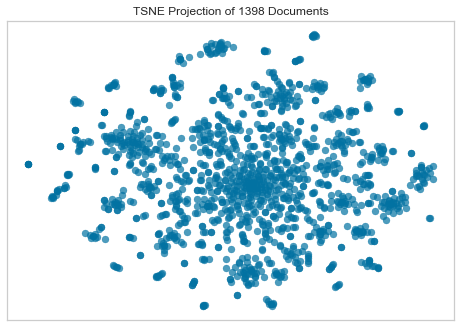

In [56]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix)
tsne.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

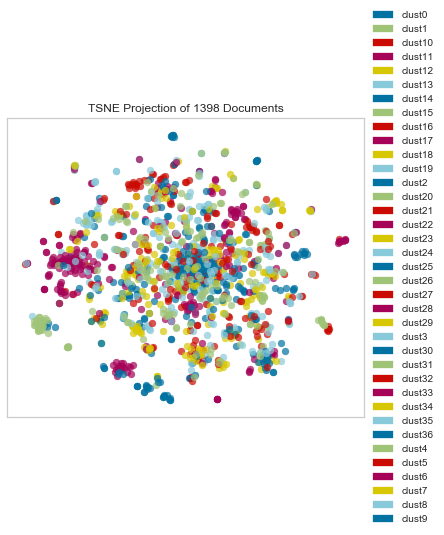

In [313]:
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix, ["clust{}".format(clust) for clust in km.labels_])
tsne.poof(outpath="tsneviz.png")

## Title Length

In [108]:
word_counter = lambda x: len(x.split())
best5["Number of Title Words"] = best5["title"].apply(word_counter)
best1["Number of Title Words"] = best1["title"].apply(word_counter)
best5["Number of Desc. Words"] = best5["description"].apply(word_counter)
best1["Number of Desc. Words"] = best1["description"].apply(word_counter)

In [111]:
print(best5["Number of Title Words"].mean())
print(best1["Number of Title Words"].mean())
print(best5["Number of Desc. Words"].mean())
print(best1["Number of Desc. Words"].mean())

2.7443105756358768
2.7904411764705883
17.53934191702432
17.606617647058822
1494
1494


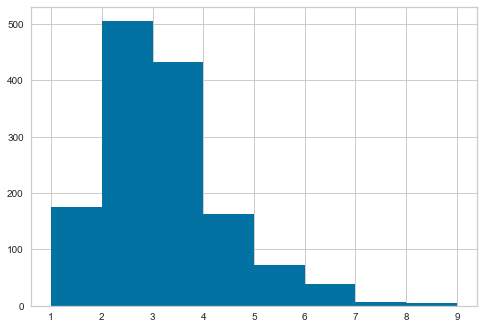

In [283]:
hist5 = best5["Number of Title Words"].hist(bins=8)
plt.savefig("five_yr_title_length.png")

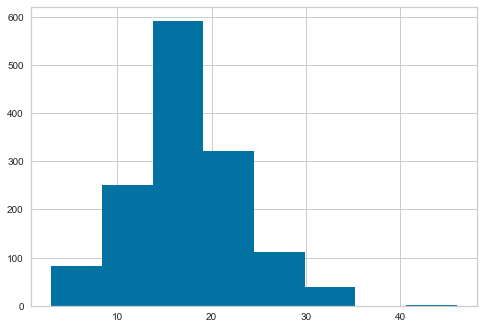

In [284]:
best5["Number of Desc. Words"].hist(bins=8)
plt.savefig("one_yr_title_length.png")

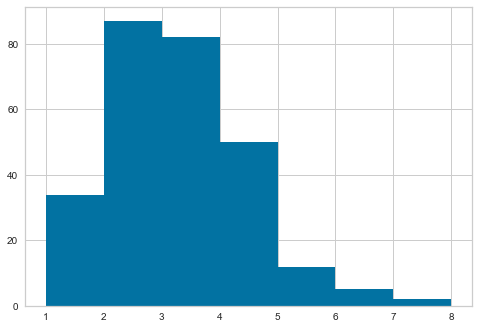

In [89]:
best1["Number of Title Words"].hist(bins=7)